In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

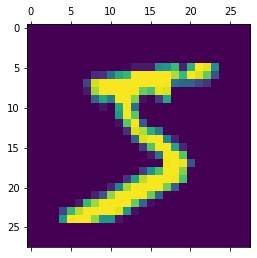

In [7]:
plt.matshow(X_train[0])

### Normalize the data

In [11]:
X_train = X_train / 255
X_test = X_test / 255

**ANN**

In [34]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    # softmax- normalise the probability of each class
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4509 - accuracy: 0.8729
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1341 - accuracy: 0.9610
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0903 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0640 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0507 - accuracy: 0.9843


In [35]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 0s 925us/step - loss: 0.0846 - accuracy: 0.9729


[0.08464740961790085, 0.9728999733924866]

**CNN**

In [28]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [29]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [32]:
cnn = models.Sequential([
    #cnn layers    
    layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #dense ann layers
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3178 - accuracy: 0.9098
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0584 - accuracy: 0.9822
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0366 - accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0234 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0157 - accuracy: 0.9950


In [33]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0499 - accuracy: 0.9866


[0.04986964538693428, 0.9865999817848206]